In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions

# Load pretrained MobileNetV2
model = EfficientNetB0(weights='imagenet')
frames = []

import cv2
import numpy as np

def extract_frames(video_path, max_frames=20):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video")
        return np.array([])


    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Handle videos where frame count is 0
    if total_frames > 0:
        step = max(1, total_frames // max_frames)
    else:
        step = 1

    count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if count % step == 0:
            frame = cv2.resize(frame, (224, 224))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # 🔴 Important fix
            frames.append(frame)

        count += 1

        if len(frames) >= max_frames:
            break

    cap.release()
    print("Extracted frames:", len(frames))
    return np.array(frames)



def classify_video(video_path):
    frames = extract_frames(video_path)

    if len(frames) == 0:
        print("No frames extracted!")
        return

    frames = preprocess_input(frames)
    predictions = model.predict(frames)

    # Average predictions across frames
    avg_pred = np.mean(predictions, axis=0)
    #top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=1)

    top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=5)

    for pred in top_pred[0]:
      print(pred[1], ":", round(pred[2]*100, 2), "%")


    print("Final Prediction:", top_pred[0][0][1])

# Replace with your video path
video_path = "/content/026c7465-309f6d33.mp4"
classify_video(video_path)
len(frames)

21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Extracted frames: 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
car_mirror : 7.07 %
cab : 6.78 %
jinrikisha : 6.62 %
limousine : 6.55 %
traffic_light : 4.73 %
Final Prediction: car_mirror


20

In [ ]:
frames[0][0]

array([[ 60,  67,  53],
       [ 57,  63,  50],
       [125, 131, 119],
       [103, 108, 101],
       [ 99, 103,  98],
       [157, 159, 153],
       [101,  99,  94],
       [ 88,  69,  71],
       [ 86,  60,  48],
       [136, 105,  91],
       [139, 102,  89],
       [136, 106,  96],
       [ 82,  61,  48],
       [ 72,  65,  46],
       [ 62,  63,  53],
       [ 62,  62,  57],
       [ 74,  72,  73],
       [ 48,  37,  36],
       [101,  70,  69],
       [111,  82,  76],
       [ 82,  60,  51],
       [ 50,  38,  38],
       [ 94,  77,  78],
       [ 81,  64,  65],
       [ 89,  72,  73],
       [113,  87,  88],
       [111,  83,  83],
       [110,  82,  82],
       [143, 112, 104],
       [132, 101,  93],
       [147, 116, 108],
       [133, 102,  94],
       [131, 100,  92],
       [143, 111, 106],
       [129, 103,  98],
       [115,  89,  84],
       [ 97,  82,  73],
       [185, 180, 168],
       [126, 118, 107],
       [168, 156, 151],
       [218, 214, 208],
       [ 78,  57

array([[[ 60,  67,  53],
        [ 57,  63,  50],
        [125, 131, 119],
        ...,
        [  8,  13,  19],
        [  8,  13,  19],
        [  8,  13,  19]],

       [[ 55,  61,  48],
        [ 60,  66,  53],
        [ 83,  89,  77],
        ...,
        [  8,  13,  19],
        [  8,  13,  19],
        [  8,  13,  19]],

       [[ 48,  54,  41],
        [ 62,  67,  55],
        [ 68,  74,  63],
        ...,
        [  8,  12,  19],
        [  8,  12,  19],
        [  8,  12,  19]],

       ...,

       [[ 47,  46,  50],
        [ 52,  52,  60],
        [ 80,  80,  88],
        ...,
        [ 41,  39,  45],
        [ 39,  37,  43],
        [ 32,  32,  37]],

       [[ 85,  84,  89],
        [100, 100, 108],
        [ 77,  77,  85],
        ...,
        [ 42,  39,  45],
        [ 38,  35,  41],
        [ 34,  33,  38]],

       [[114, 113, 118],
        [ 78,  78,  86],
        [ 73,  73,  81],
        ...,
        [ 42,  39,  45],
        [ 40,  37,  43],
        [ 36,  35,  40]]], dtype=uint8)
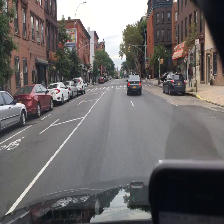

In [ ]:
frames[0]

Extracted frames: 21
Shape of frames: (21, 224, 224, 3)


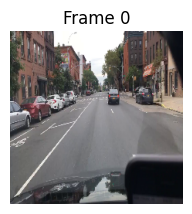

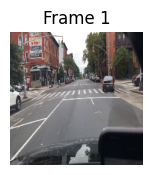

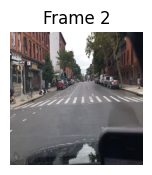

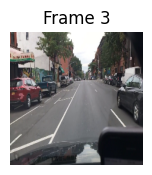

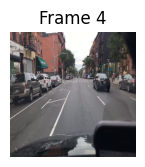

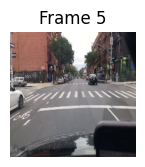

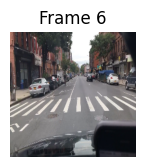

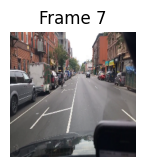

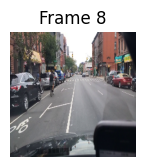

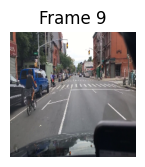

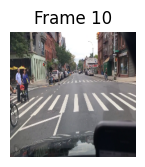

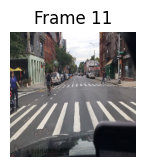

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
video_path="/content/026c7465-309f6d33.mp4"
# Extract frames
extracted_frames = extract_frames(video_path)

# Ensure numpy array
extracted_frames = np.array(extracted_frames)

print("Shape of frames:", extracted_frames.shape)

# Number of frames to show
num_frames_to_show = min(12, len(extracted_frames))

# Grid size
cols = 4
rows = int(np.ceil(num_frames_to_show / cols))

plt.figure(figsize=(12, 6))

for i in range(num_frames_to_show):
  plt.subplot(rows, cols, i + 1)
  plt.imshow(extracted_frames[i])
  plt.title(f"Frame {i}")
  plt.axis("off")

  plt.tight_layout ()
  plt.show()

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import Input, TimeDistributed, GRU, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

IMG_SIZE = 224
SEQUENCE_LENGTH = 20
NUM_CLASSES = 2

# =============================
# Load CNN Feature Extractor
# =============================
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    pooling='avg'
)
base_model.trainable = False

# =============================
# Extract All Frames
# =============================
def extract_all_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

    cap.release()
    return np.array(frames)

# =============================
# Create Sequences
# =============================
def create_sequences(frames, sequence_length):
    sequences = []
    for i in range(0, len(frames) - sequence_length, sequence_length):
        seq = frames[i:i+sequence_length]
        sequences.append(seq)
    return np.array(sequences)

# =============================
# MAIN
# =============================
video_path = "/content/026c7465-309f6d33.mp4"

print("Extracting frames...")
frames = extract_all_frames(video_path)

print("Creating sequences...")
sequences = create_sequences(frames, SEQUENCE_LENGTH)

print("Total sequences:", len(sequences))

# Preprocess
sequences = preprocess_input(sequences)

# Extract CNN features
print("Extracting CNN features...")
num_samples = sequences.shape[0]
features = []

for i in range(num_samples):
    feat = base_model.predict(sequences[i])
    features.append(feat)

features = np.array(features)  # (samples, 20, 1280)

# =============================
# Artificial Labels
# =============================
# First half -> class0
# Second half -> class1
labels = np.zeros(num_samples)

labels[num_samples//2:] = 1

labels = to_categorical(labels, NUM_CLASSES)

# =============================
# Build GRU Model
# =============================
input_layer = Input(shape=(SEQUENCE_LENGTH, 1280))
x = GRU(128)(input_layer)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(input_layer, output)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# =============================
# Train Model
# =============================
model.fit(features, labels, epochs=5, batch_size=2)

# =============================
# Predict
# =============================
prediction = model.predict(features[0:1])

class_names = ["Car", "No car"]

predicted_class = class_names[np.argmax(prediction)]

print("Predicted Class:", predicted_class)


Extracting frames...
Creating sequences...
Total sequences: 119
Extracting CNN features...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 20, 1280)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 128)            │       541,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,698 (2.07 MB)

 Trainable params: 541,698 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8410 - loss: 0.6536
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 1.0000 - loss: 0.0163
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 1.0000 - loss: 0.0056
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 1.0000 - loss: 0.0026
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 1.0000 - loss: 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Predicted Class: Car
